<a href="https://colab.research.google.com/github/Greeshu-09/AISECT-AIML/blob/main/Weather_skewness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df=pd.read_csv("/content/Project 1 - Weather Dataset (1).csv")

In [3]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
df = df.drop(['Date/Time'], axis=1)


In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric Columns:", num_cols.tolist())


Numeric Columns: ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']


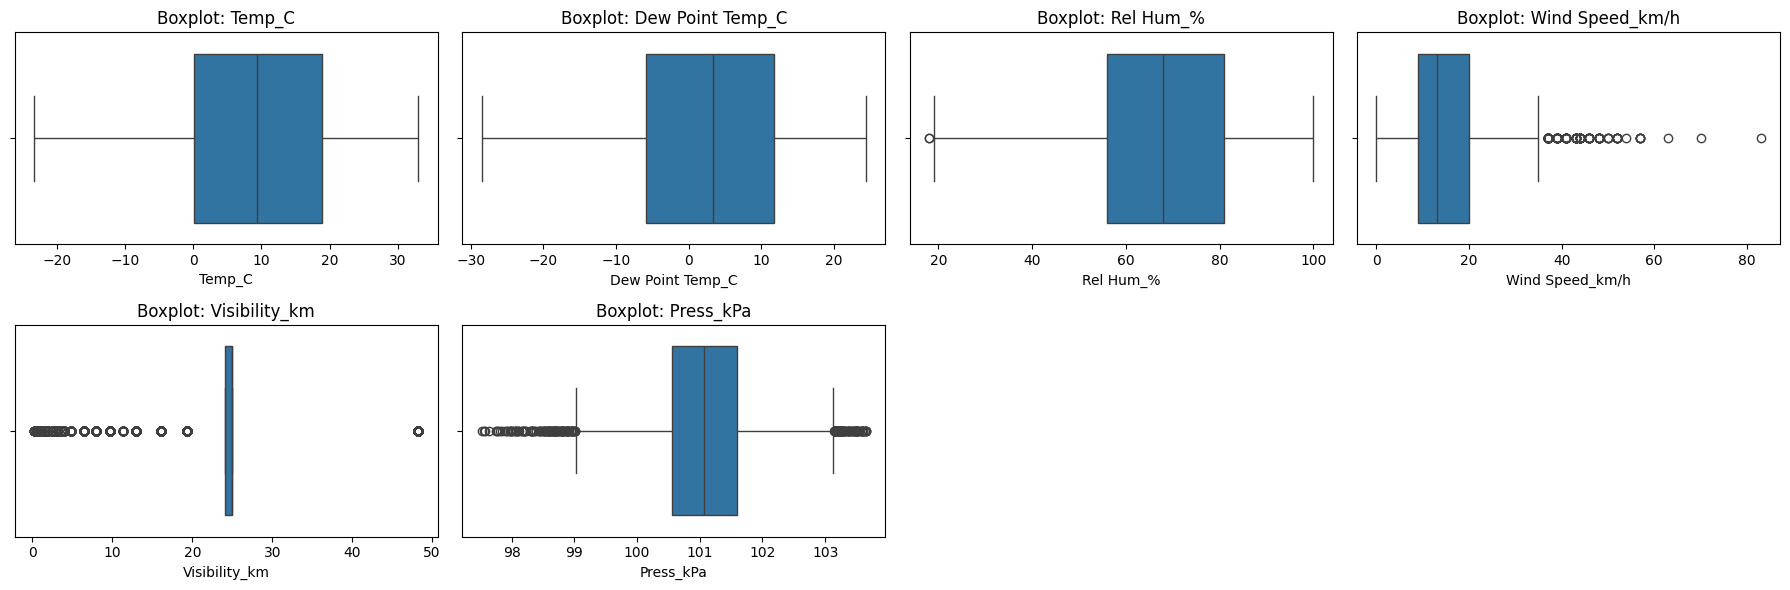

In [7]:
# Step 4: Detect outliers visually using boxplots
plt.figure(figsize=(18, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [11]:
def replace_outliers_with_boundaries(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace values outside bounds with boundary values
    series = np.where(series < lower, lower, series)
    series = np.where(series > upper, upper, series)
    return series

# Apply to all numeric columns
for col in num_cols:
    df[col] = replace_outliers_with_boundaries(df[col])


Temp_C: Skewness = -0.178
Dew Point Temp_C: Skewness = -0.318
Rel Hum_%: Skewness = -0.324
Wind Speed_km/h: Skewness = 0.529
Visibility_km: Skewness = -0.234
Press_kPa: Skewness = -0.097


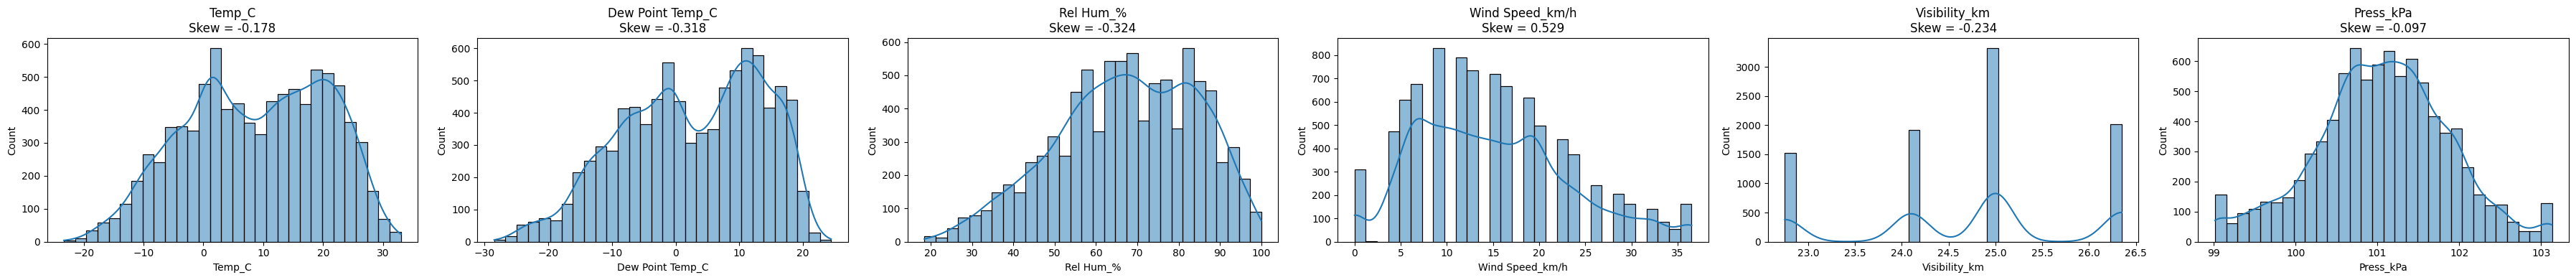

In [14]:
# Step 6: Check skewness before and after fixing
n = len(num_cols)
plt.figure(figsize=(6*n, 4))  # width grows with number of columns

for i, col in enumerate(num_cols):
    skew_val = skew(df[col].dropna())
    print(f"{col}: Skewness = {skew_val:.3f}")

    plt.subplot(1, n, i+1)  # 1 row, n columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col}\nSkew = {skew_val:.3f}")

plt.tight_layout()
plt.show()

Temp_C: Before = -0.178, After = -0.202


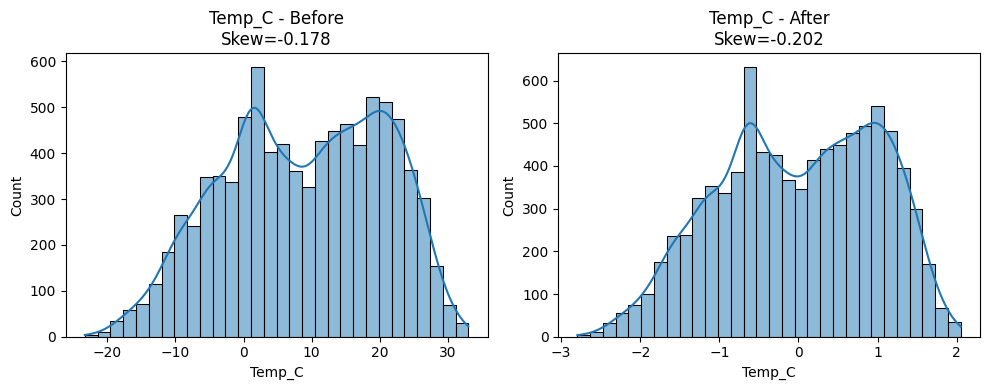

Dew Point Temp_C: Before = -0.318, After = -0.154


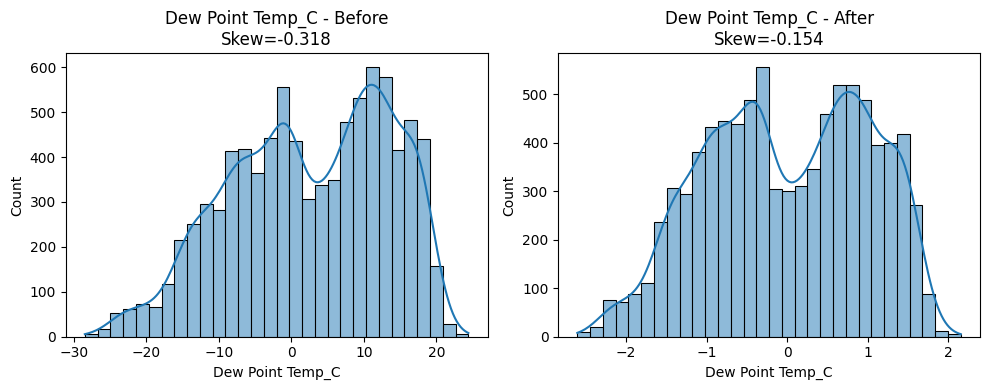

Rel Hum_%: Before = -0.324, After = -0.106


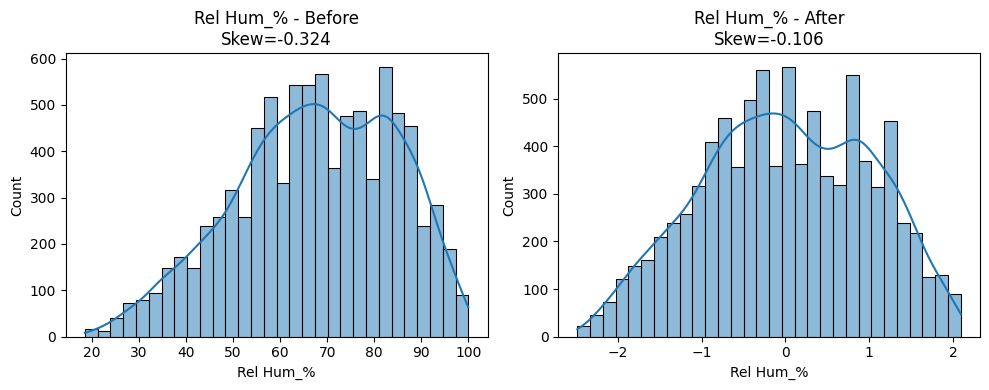

Wind Speed_km/h: Before = 0.529, After = -0.041


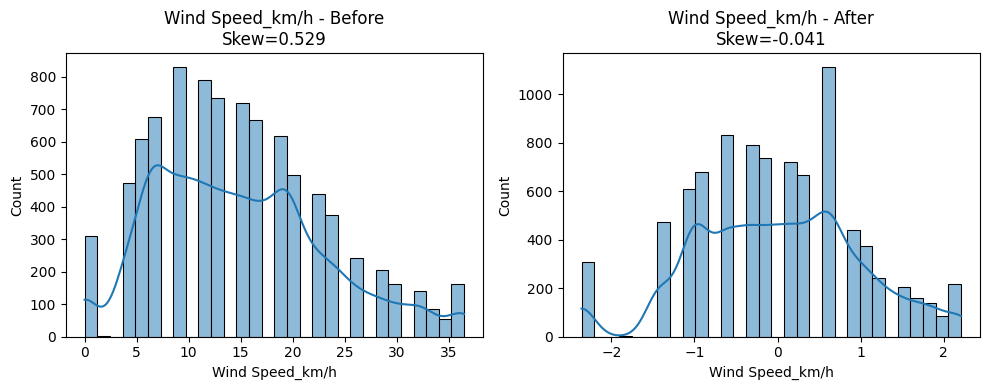

Visibility_km: Before = -0.234, After = -0.046


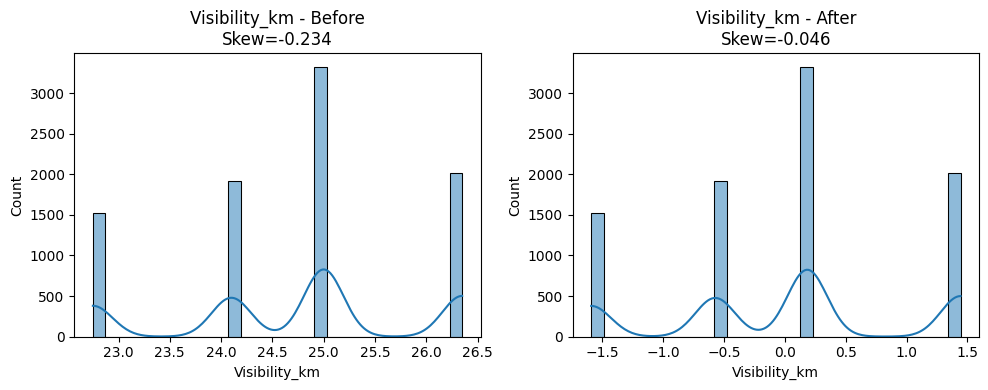

Press_kPa: Before = -0.097, After = 0.001


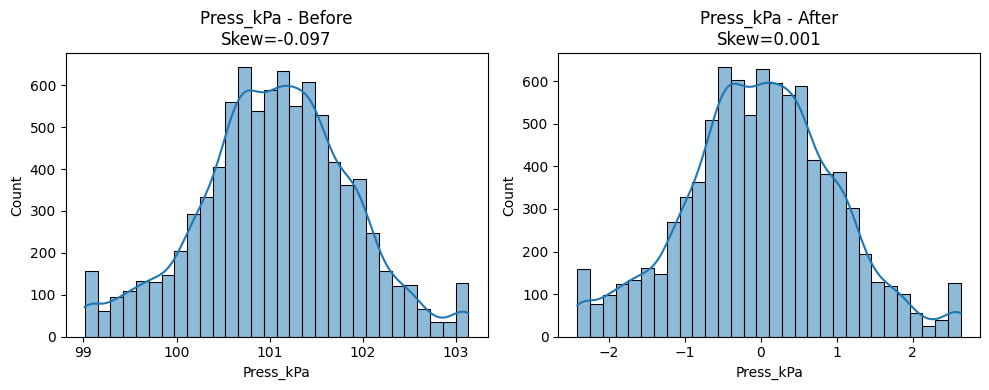

In [16]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_transformed = df.copy()
df_transformed[num_cols] = pt.fit_transform(df[num_cols])

# Compare skewness before vs after
for col in num_cols:
    before_skew = skew(df[col].dropna())
    after_skew = skew(df_transformed[col].dropna())
    print(f"{col}: Before = {before_skew:.3f}, After = {after_skew:.3f}")

    # Plot before vs after distributions
    plt.figure(figsize=(10,4))

    # Before
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} - Before\nSkew={before_skew:.3f}")

    # After
    plt.subplot(1,2,2)
    sns.histplot(df_transformed[col], kde=True, bins=30)
    plt.title(f"{col} - After\nSkew={after_skew:.3f}")

    plt.tight_layout()
    plt.show()
